In [1]:
import os, gzip, binascii, struct, numpy
from six.moves.urllib.request import urlretrieve
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

%load_ext line_profiler
%load_ext memory_profiler


def fully_conntected_activation(input,size_in,size_out):
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    activation = tf.nn.relu(tf.matmul(input,W)+b)
    
    return activation

def fully_conntected(input,size_in,size_out):
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    activation = tf.matmul(input,W)+b
    
    return activation

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

IMAGE_SIZE = 28
HIDDEN_LAYER = 300
NUM_LABELS = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# Draw losses curves during one training phase
def draw(x, ylable) :
    plt.plot(x)
    plt.ylabel(ylable)
    plt.xlabel('Training Iteration')
    plt.show()

In [6]:
def mnist_run(verbose=False):

    x = tf.placeholder(tf.float32, [None, IMAGE_SIZE * IMAGE_SIZE])
    y_true = tf.placeholder(tf.float32,[None, NUM_LABELS])

    hidden = fully_conntected_activation(x,IMAGE_SIZE * IMAGE_SIZE, HIDDEN_LAYER)
    output = fully_conntected(hidden,HIDDEN_LAYER,NUM_LABELS)

    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=output))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

    # test the model
    correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run() #Should be tf.global_variables_initializer for newer APIs

    losses = []
    accues = []
    # Training
    for i in range(600):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        l,_,a = sess.run([cross_entropy, train_step, accuracy], 
                         feed_dict={x: batch_xs, y_true: batch_ys})
        losses.append(l)
        accues.append(a)
    
    if verbose:
        draw(losses, "Loss");
        draw(accues, "Accuracy");
        #Test accuracy on test dataset
        print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))
        #if i%100 == 0 or (i < 100 and i % 10 == 0):
        #    print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

    return l, a

In [7]:
import time
ts = []
for i in range(10):
    x = time.time(); 
    mnist_run(); 
    ts.append(time.time() - x)
print ts
print "%.3f (%.3f)" % (numpy.mean(ts), numpy.std(ts))
# %time mnist_run() -- another possible method to measure time

[3.170797109603882, 3.2681078910827637, 3.2888388633728027, 3.2692670822143555, 3.222506046295166, 3.1886658668518066, 3.2349610328674316, 3.241157054901123, 3.314378023147583, 3.3223202228546143]
3.252 (0.048)


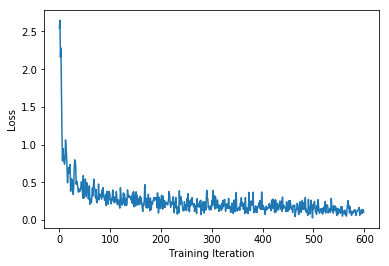

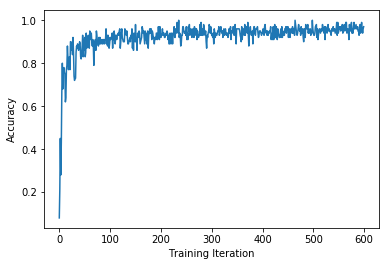

0.9641


(0.10762554, 0.97000003)

In [8]:
mnist_run(verbose=True)

In [10]:
%memit -r 5 mnist_run()

peak memory: 1360.64 MiB, increment: 330.92 MiB
